In [25]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings 
warnings.filterwarnings('ignore')

In [26]:
df=pd.read_csv("Protein.csv",index_col=0)
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [27]:
clust=[2,3,4,5,6,7,8]
scores=[]
for i in clust:
    km=KMeans(n_clusters=i, random_state=23)
    km.fit(df_scaled)
    scores.append(km.inertia_)

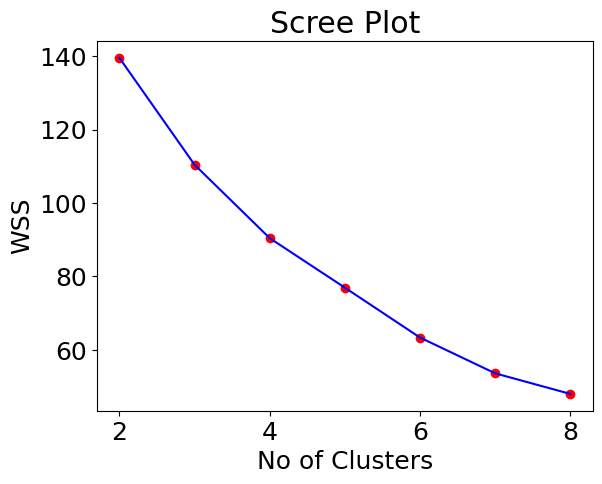

In [28]:
plt.scatter(clust,scores,c='red')
plt.plot(clust,scores,c='blue')
plt.title('Scree Plot')
plt.xlabel('No of Clusters')
plt.ylabel('WSS')
plt.show()

In [29]:
##############3
km=KMeans(n_clusters=3,random_state=23)
km.fit(df_scaled)
print(km.labels_)
print(km.predict(df_scaled))

[1 2 2 1 2 2 2 2 2 0 1 2 0 2 2 2 0 1 0 2 2 2 1 2 1]
[1 2 2 1 2 2 2 2 2 0 1 2 0 2 2 2 0 1 0 2 2 2 1 2 1]


In [30]:
clust_df=df.copy()
clust_df['Cluster']=km.labels_
clust_df.sort_values(by='Cluster')

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,Cluster
Country,,,,,,,,,,
Italy,9.0,5.1,2.9,13.7,3.4,36.8,2.1,4.3,6.7,0
Spain,7.1,3.4,3.1,8.6,7.0,29.2,5.7,5.9,7.2,0
Portugal,6.2,3.7,1.1,4.9,14.2,27.0,5.9,4.7,7.9,0
Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5,0
USSR,9.3,4.6,2.1,16.6,3.0,43.6,6.4,3.4,2.9,1
Romania,6.2,6.3,1.5,11.1,1.0,49.6,3.1,5.3,2.8,1
Hungary,5.3,12.4,2.9,9.7,0.3,40.1,4.0,5.4,4.2,1
Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,1
Yugoslavia,4.4,5.0,1.2,9.5,0.6,55.9,3.0,5.7,3.2,1


[0.44515973 0.18166661 0.12532439 0.10607377 0.0515376  0.03612566
 0.03017848 0.01292132 0.01101243]


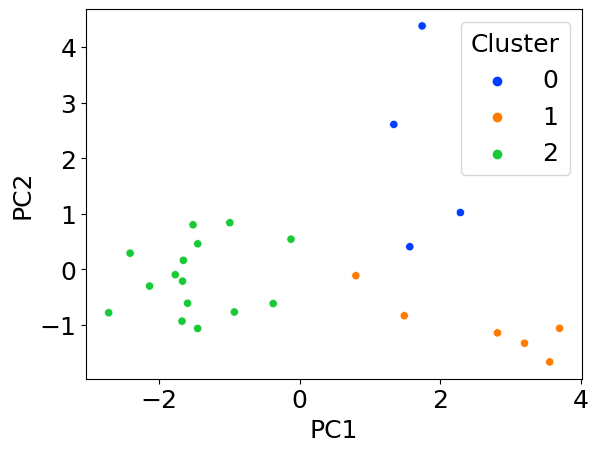

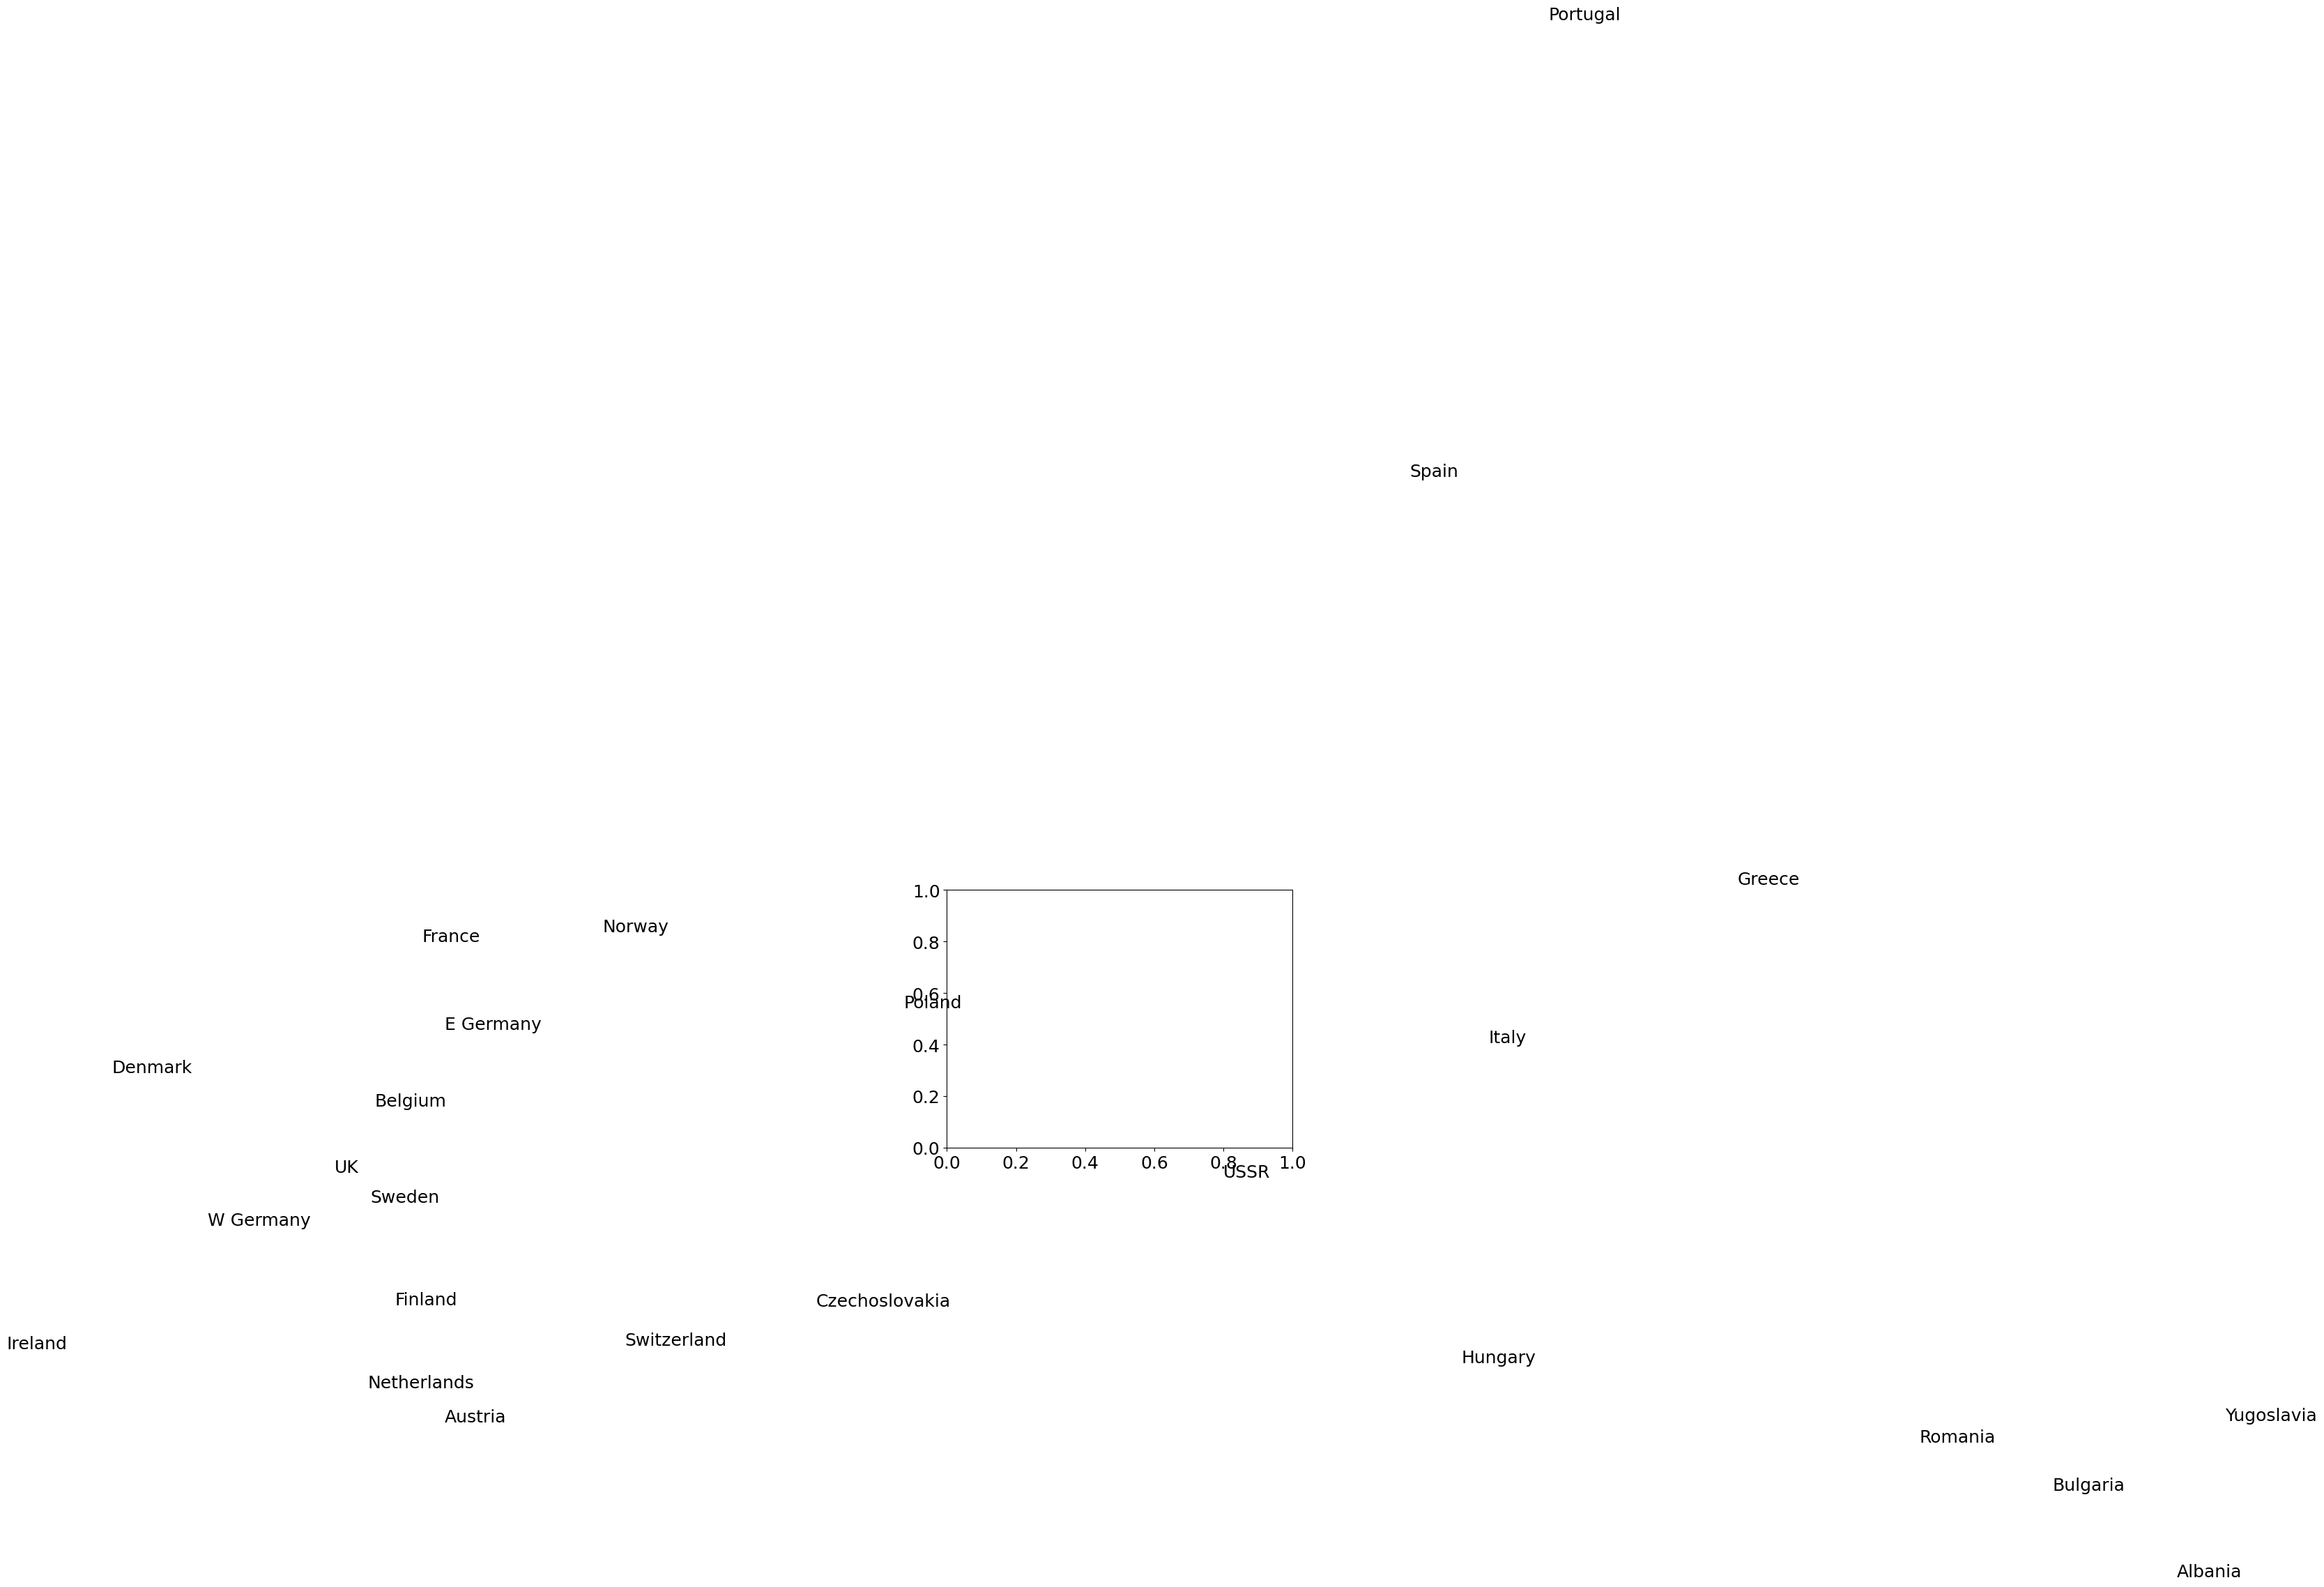

In [34]:
############ PCA ###########
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

prcomp=PCA()
scores=prcomp.fit_transform(df_scaled)
print(prcomp.explained_variance_ratio_)
df_PCs=pd.DataFrame({'PC1':scores[:,0],'PC2':scores[:,1],'Cluster':km.labels_})
df_PCs['Cluster']=df_PCs['Cluster'].astype(object)

sns.scatterplot(data=df_PCs,x='PC1',y='PC2',palette='bright',hue='Cluster')
plt.show()

import numpy as np
from pca import pca

for i in np.arange(0,df_scaled.shape[0]):
    plt.text(scores[i,0],scores[i,1],list(df.index)[i])
plt.show()

# MILK

IndexError: index 25 is out of bounds for axis 0 with size 25

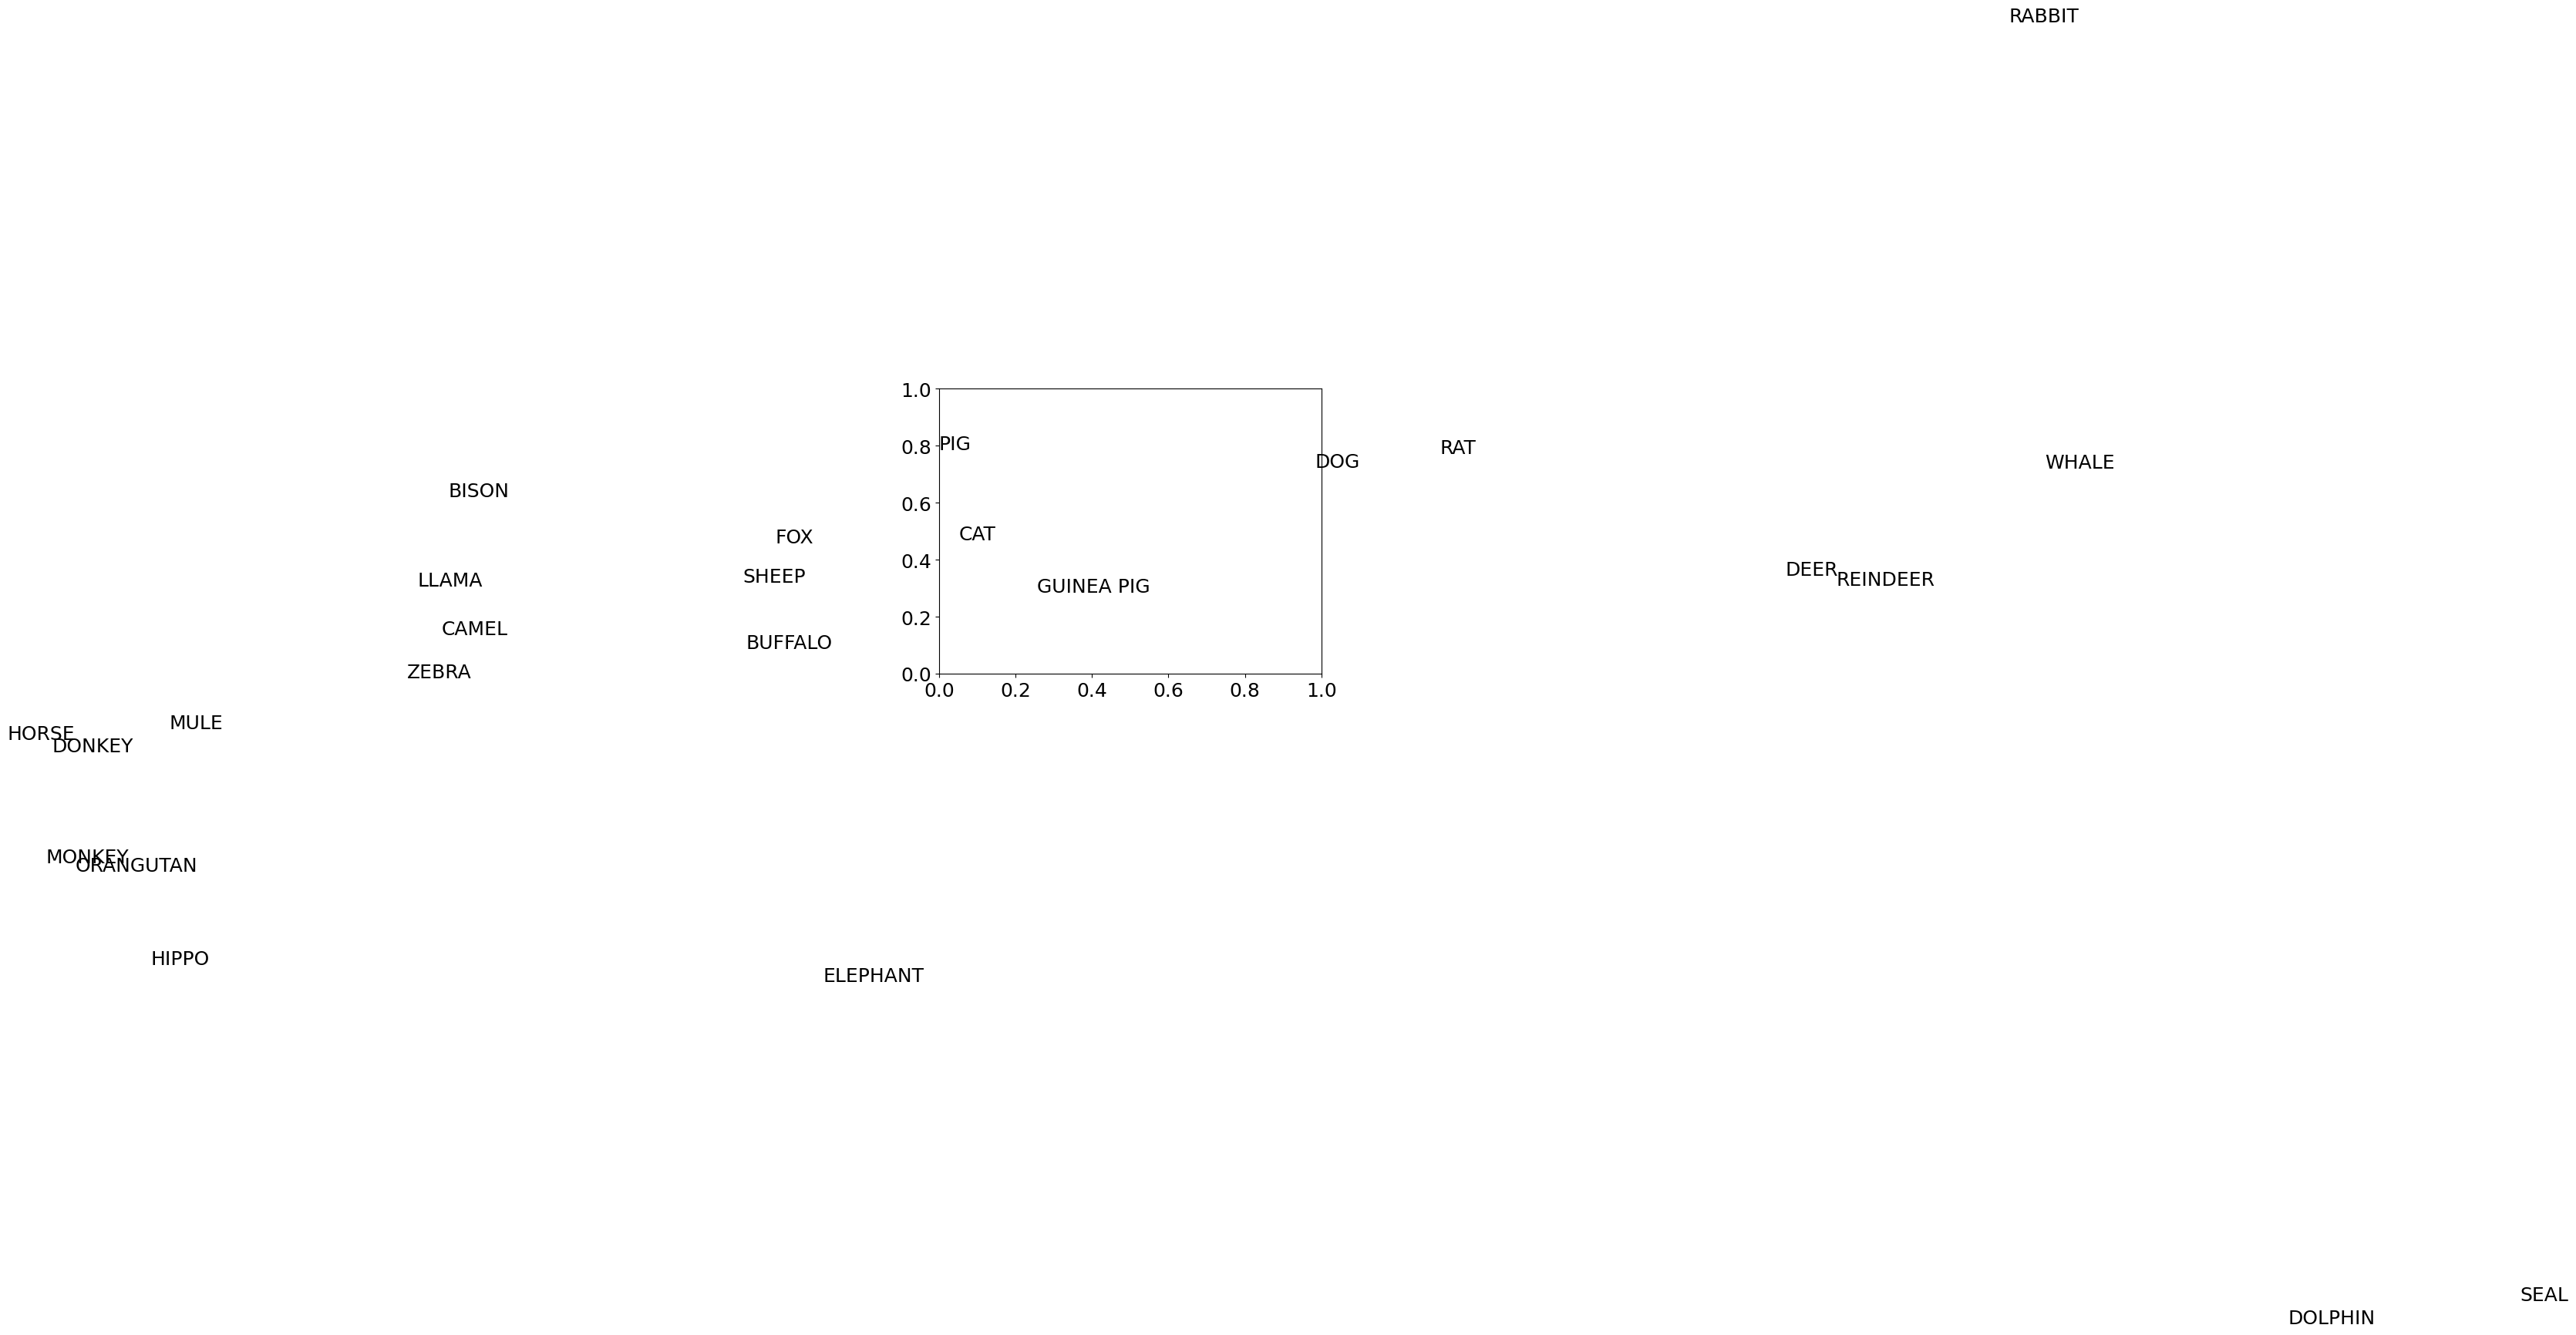

In [36]:
from sklearn.pipeline import Pipeline
data = pd.read_csv('milk.csv', index_col= 0)
clustering = KMeans(n_clusters=3, random_state= 23)
pipe = Pipeline([('SCL',scaler),('CLUST',clustering)])
pipe.fit(data)
pca = PCA(n_components= 2)
pca_array = pca.fit_transform(StandardScaler().fit_transform(data))
pca_data = pd.concat([pd.DataFrame(df, columns=['PCA1', 'PCA2']),
                     pd.DataFrame(clustering.labels_,columns= ['cluster'])], axis=1)
sns.scatterplot(data = pca_data, x = 'PCA1', y = 'PCA2', hue='cluster',palette='bright')
for i in range(0, pca_data.shape[0]):
    plt.text(pca_array[i,0], pca_array[i,1],list(data.index)[i])